In [2]:
NAME = "Md. Faisal Iftekhar"
ID = "22299116"
Section = "16"
SET = "A"

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial

## **Question 01** [2+2 Marks]

a) Represent the following polynomial using Polynomial library. Print the Polynomial equation.
   $f(x) = -3(6x-1)^2 + 3$

b) Plot the polynomial for the range $-8 \leq x \leq 8$

In [31]:
# 1 a

coeff = [0, 36, -108]
p = Polynomial(coeff)
print(p)

0.0 + 36.0 x - 108.0 x**2


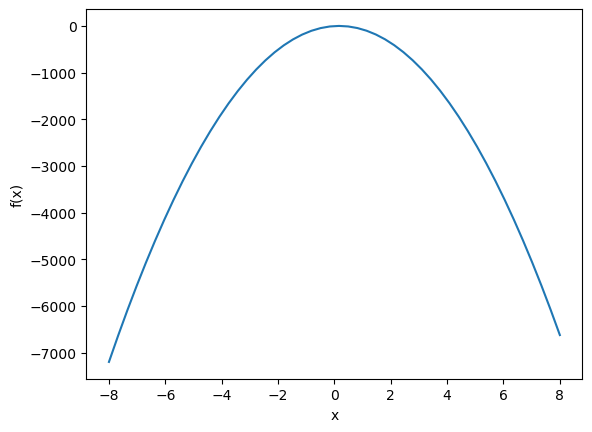

In [30]:
# 1 b

x_val = np.linspace(-8, 8)
y_val = p(x_val)

plt.plot(x_val, y_val)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## **Question 02** [2+2 marks]

a) In Vandermonde matrix, the equation can be written as $\mathbf{X}a = y$,

where $\mathbf{X} = \begin{bmatrix}
x_0^0 & x_0^1 & x_0^2 & \cdots & x_0^n \\
x_1^0 & x_1^1 & x_1^2 & \cdots & x_1^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
x_{n-1}^0 & x_{n-1}^1 & x_{n-1}^2 & \cdots & x_{n-1}^n \\
x_n^0 & x_n^1 & x_n^2 & \cdots & x_n^n
\end{bmatrix}$

Now you have to implement the following matrix:

$\mathbf{X}_{new} = \begin{bmatrix}
x_n^0 & x_n^1 & x_n^2 & \cdots & x_n^n \\
x_{n-1}^0 & x_{n-1}^1 & x_{n-1}^2 & \cdots & x_{n-1}^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
x_2^0 & x_1^1 & x_1^2 & \cdots & x_2^n \\
x_1^0 & x_1^1 & x_1^2 & \cdots & x_1^n
\end{bmatrix}$

Write a function that takes data_x as parameter and populates the $\mathbf{X}_{new}$ matrix.

b) Given a function $f(x) = x^3 + 5x$.
Find out the value of $\frac{f'(x)+f''(x)}{f(x)}$ at $x = 2$?

In [29]:
# 2 a

def vandermonde(data_x, data_y):
  n_nodes = len(data_x)
  X = np.zeros((n_nodes, n_nodes))

  for i in range(len(data_x)):
    for j in range(len(data_x)):
      X[i][j] = data_x[len(data_x) - i -1] ** j

  return(X)

data_x=np.array([1, 2, 3, 4, 5])
data_y=np.array([1, 2, 3, 4, 5])
v = vandermonde(data_x, data_y)
print(v)

[[  1.   5.  25. 125. 625.]
 [  1.   4.  16.  64. 256.]
 [  1.   3.   9.  27.  81.]
 [  1.   2.   4.   8.  16.]
 [  1.   1.   1.   1.   1.]]


In [28]:
# 2 b

coeff_2 = [0, 5, 0, 1]
p_2 = Polynomial(coeff_2)

first = p_2.deriv(1)
second = p_2.deriv(2)

x_at2 = (first(2)+second(2))/p_2(2)
print(x_at2)

1.6111111111111112


## **Question 03** [2 + 2 Marks]

A physicist is studying the velocity of an object moving along a straight line. The velocity of the object is recorded at specific times, and the physicist wants to use numerical methods to estimate the velocity as a function of time. The recorded values are given below:

<div style="font-size: 16px;">

| Time t (seconds) &nbsp;&nbsp;&nbsp; | Velocity v(t) (m/s) &nbsp;&nbsp;&nbsp; |
|:-----------------------------------:|:--------------------------------------:|
| &nbsp;&nbsp;&nbsp; 1 &nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp; 0 &nbsp;&nbsp;&nbsp; |
| &nbsp;&nbsp;&nbsp; 4 &nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp; 15 &nbsp;&nbsp;&nbsp; |
| &nbsp;&nbsp;&nbsp; 6 &nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp; 30 &nbsp;&nbsp;&nbsp; |

</div>

You already know how to find out the interpolating polynomial using Lagrange Interpolation Method. Now, as you are a computer scientist you invented a new interpolation method named Dagrange Interpolation.

General form of an n degree dagrange polynomial:
$$p_n(x) = \sum_{k=0}^n f(x_k)\frac{n}{d_k(x)}$$

where
$$d_k(x) = n\prod_{j=0, j\neq k}^n \frac{x_k-x_j}{x-x_j}$$

a) Evaluate the Dagrange bases $[d_0(x), d_1(x), d_2(x)]$ of the polynomial that goes through the above data points where time = 3s.

b) Calculate the velocity from Dagrange Interpolating polynomial at time = 5s.

In [25]:
def dagrange_bases(k, x, data_x):

  n = len(data_x) - 1
  product = 1.0

  for j in range(len(data_x)):
    if j != k:
      product *= (data_x[k] - data_x[j])/(x - data_x[j])
            
  d_k = n * product
  return d_k

def dagrange_polynomial(data_x, data_y, x):

  n = len(data_x) - 1
  result = 0
  bases_arr = []
    
  for k in range(len(data_x)):
    d_k = dagrange_bases(k, x, data_x)
    bases_arr.append(d_k)
    result += data_y[k] * n / d_k

  return result, bases_arr

data_x = np.array([1, 4, 6])  # 3 points = degree 2
data_y = np.array([0, 15, 30])

In [26]:
# 3 a

x_test = 3
result_3, bases_3 = dagrange_polynomial(data_x, data_y, x_test)
print(f"Dagrange bases at x = 3: {bases_3}")

Dagrange bases at x = 3: [10.0, 2.0, -10.0]


In [27]:
# 3 b

x_interpolate = 5
result_5, bases_5 = dagrange_polynomial(data_x, data_y, x_interpolate)
print(f"Velocity at x = 5: {result_5}")

Velocity at x = 5: 22.0
